회귀에 대해서 이미 공부를 했기 때문에 이 곳에는 실습 위주로 적겠습니다. 

---

In [1]:
# 보스턴 집값 분석
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

boston = load_boston()


bostonDF = pd.DataFrame(data = boston.data, columns = boston.feature_names)

bostonDF['Price'] = boston.target

bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


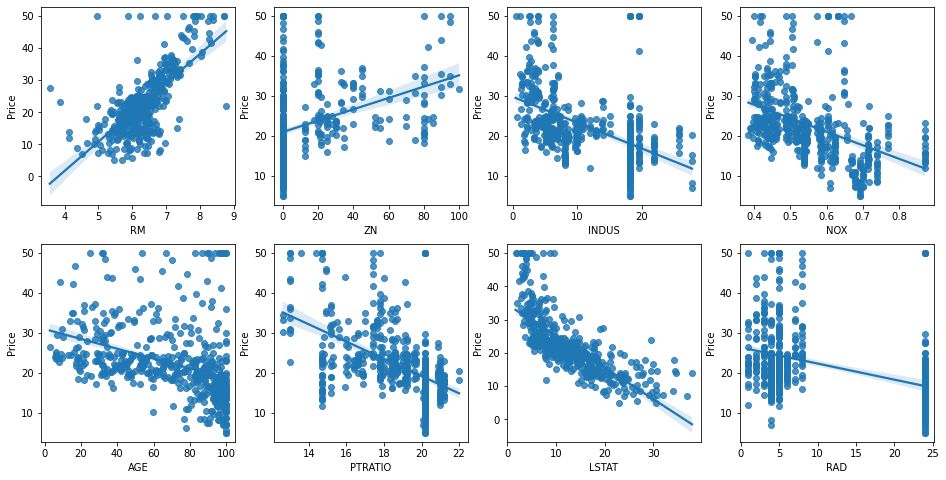

In [5]:
# 시각화 코드
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', "NOX", "AGE", "PTRATIO", "LSTAT", "RAD"]

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y='Price', data=bostonDF, ax=axs[row][col])

In [14]:
## 선형회귀를 이용한 모델학습 및 평가
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = bostonDF['Price']
X = bostonDF.drop(['Price'], axis = 1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)

print("mse, rmse, r2 score: ", mse, rmse, r2score)

# 사이킷런의 지표 평가기준은 높을 수록 좋다고 평가되기 때문에 높을수록 좋지 않은 지표들은 음의 값을 취해줘야함.
neg_mse_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_score = np.sqrt(-1*neg_mse_score)

print("\ncv 교차 검증을 이용한 mse, rmse: \n", neg_mse_score, rmse_score)

mse, rmse, r2 score:  18.140266604383065 4.2591391858429635 0.7854511954574209

cv 교차 검증을 이용한 mse, rmse: 
 [-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656] [3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]


### 엘라스틱넷 회귀: L1 규제와 L2 규제를 함께 시행하는 회귀

---
### 선형회귀를 하려는 데이터가 심하게 왜곡되어 있는 경우에는 로그변환을 사용하는게 효율적이다.
> np.log1p(input_data)

 ---
### Logistic Regression
> LogisiticResgression(solver, penalty, C)

solver : 최적화 방안 선택<br>
penalty : 규제 선택 (l1, l2)<br>
C : 1/alpha(학습률) 

---

## 회귀 트리

In [33]:
# 트리생성이 CART알고리즘에 기반하고 있기 때문에 회귀도 가능함
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()
df = pd.DataFrame(boston.data, columns= boston.feature_names)
df['price'] = boston.target

y = df['price']
X = df.drop(['price'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X,y, scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1* neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE scores: ', round(avg_rmse, 2))

 5 교차 검증의 개별 Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores:  [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE scores:  4.42


In [34]:
import pandas as pd

df = pd.read_csv('bike_train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [36]:
df["datetime"] = df.datetime.apply(pd.to_datetime)

df["year"] = df.datetime.apply(lambda x : x.year)
df["month"] = df.datetime.apply(lambda x : x.month)
df["day"] = df.datetime.apply(lambda x : x.day)
df["hour"] = df.datetime.apply(lambda x : x.hour)
df.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

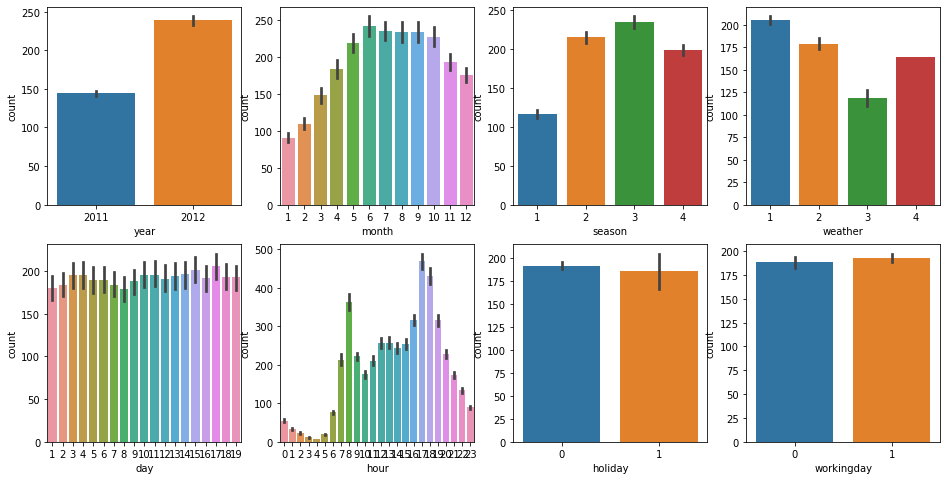

In [42]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
cat_features = ['year', 'month', 'season','weather', 'day', 'hour', 'holiday', 'workingday']
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    sns.barplot(x=feature, y='count', data=df, ax=axs[row][col])

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 


#RMSLE함수 만들기(sklearn에서 제공하지 않음.)
# Root Mean Squared Log Error
def rmsle(y, pred):
    #로그 값 변환시 NaN 등의 이슈로 log+1을 통해서 계산한다.
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle= np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE: {0:.3f}, RMSEL: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val) )

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y = df['count']
X = df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE: 1.150, RMSEL: 135.729, MAE: 101.787


In [60]:
def get_top_error_data(y_test, pred, n_tops=5):
    result = pd.DataFrame(y_test.values, columns=['real_count'])
    result['predicted_count'] = np.round(pred)
    result['diff'] = np.abs(result['real_count']-result['predicted_count'])
    
    print(result.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test, pred,10)

      real_count  predicted_count   diff
2072         835            216.0  619.0
1671         678            136.0  542.0
1901         738            199.0  539.0
1048         745            212.0  533.0
1172         806            292.0  514.0
588          819            314.0  505.0
508          662            158.0  504.0
1378         822            320.0  502.0
818          791            298.0  493.0
81           520             36.0  484.0


<AxesSubplot:>

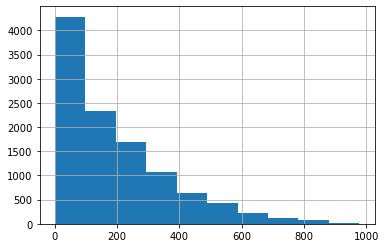

In [61]:
y.hist()

데이터가 왜곡되게 분포하기 때문에 오차가 굉장히 커짐.

<AxesSubplot:>

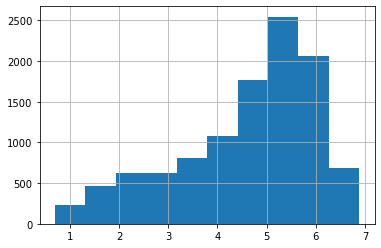

In [62]:
y_log = np.log1p(y)
y_log.hist()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y_log, test_size=0.2, random_state=156)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE: 0.991, RMSEL: 154.526, MAE: 103.084


원-핫 인코딩을 하지 않아서 이렇게 큰 오차가 관측됨.

In [65]:
X_ohe = pd.get_dummies(X, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe,y_log, test_size=0.2, random_state=156)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE: 0.590, RMSEL: 92.803, MAE: 61.100


In [69]:
def get_model_predict(model, X_train, X_test, y_train, y_test, isexpm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    if isexpm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
    
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, isexpm1=True)
        

### LinearRegression ###
RMSLE: 0.590, RMSEL: 92.803, MAE: 61.100
### Ridge ###
RMSLE: 0.590, RMSEL: 93.477, MAE: 61.323
### Lasso ###
RMSLE: 0.632, RMSEL: 107.120, MAE: 69.037


In [71]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf = RandomForestRegressor(n_estimators=500)
gbm =GradientBoostingRegressor(n_estimators=500)
xgb  = XGBRegressor(n_estimators=500)
lgbm = LGBMRegressor(n_estimators=500)

for model in [rf, gbm, xgb, lgbm]:
    get_model_predict(model, X_train, X_test, y_train, y_test, isexpm1=True)

### RandomForestRegressor ###
RMSLE: 0.349, RMSEL: 44.883, MAE: 28.263
### GradientBoostingRegressor ###
RMSLE: 0.325, RMSEL: 49.646, MAE: 30.586
### XGBRegressor ###
RMSLE: 0.336, RMSEL: 51.244, MAE: 29.973
### LGBMRegressor ###
RMSLE: 0.306, RMSEL: 43.577, MAE: 27.012


---

## 캐글 주택 가격: 고급 회귀 기법

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('house_price.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [70]:
print("shape of data\n", data.shape)
print("\nfeature type\n", data.dtypes.value_counts())
isnull_series = data.isnull().sum()
print("\nNull 칼럼과 그 건수: \n", isnull_series[isnull_series > 0].sort_values())

shape of data
 (1460, 81)

feature type
 object     43
int64      35
float64     3
dtype: int64

Null 칼럼과 그 건수: 
 Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


In [71]:
data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

<AxesSubplot:>

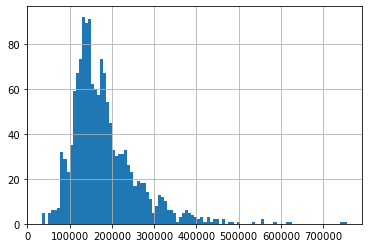

In [72]:
data['SalePrice'].hist(bins=100)

In [73]:
data['SalePrice'] = np.log1p(data['SalePrice'])

In [74]:
data.drop(['Id'], axis=1, inplace=True)
data.fillna(data.mean(), inplace=True)

In [75]:
data.isnull().sum()[data.isnull().sum()>0]

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [76]:
data_ohe = pd.get_dummies(data)
data_ohe.shape

(1460, 271)

In [77]:
data_ohe

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [133]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, ' 로그 변환된 RMSE: ', np.round(rmse,3))

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    visualize_coefficient(models)

In [92]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = data_ohe['SalePrice']
X = data_ohe.drop('SalePrice', axis=1, inplace=False)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=156)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

model = [lr_reg, ridge_reg, lasso_reg]
get_rmses(model)

LinearRegression  로그 변환된 RMSE:  0.129
Ridge  로그 변환된 RMSE:  0.125
Lasso  로그 변환된 RMSE:  0.247


[0.1286417002955657, 0.12485655024416405, 0.2468379362660437]

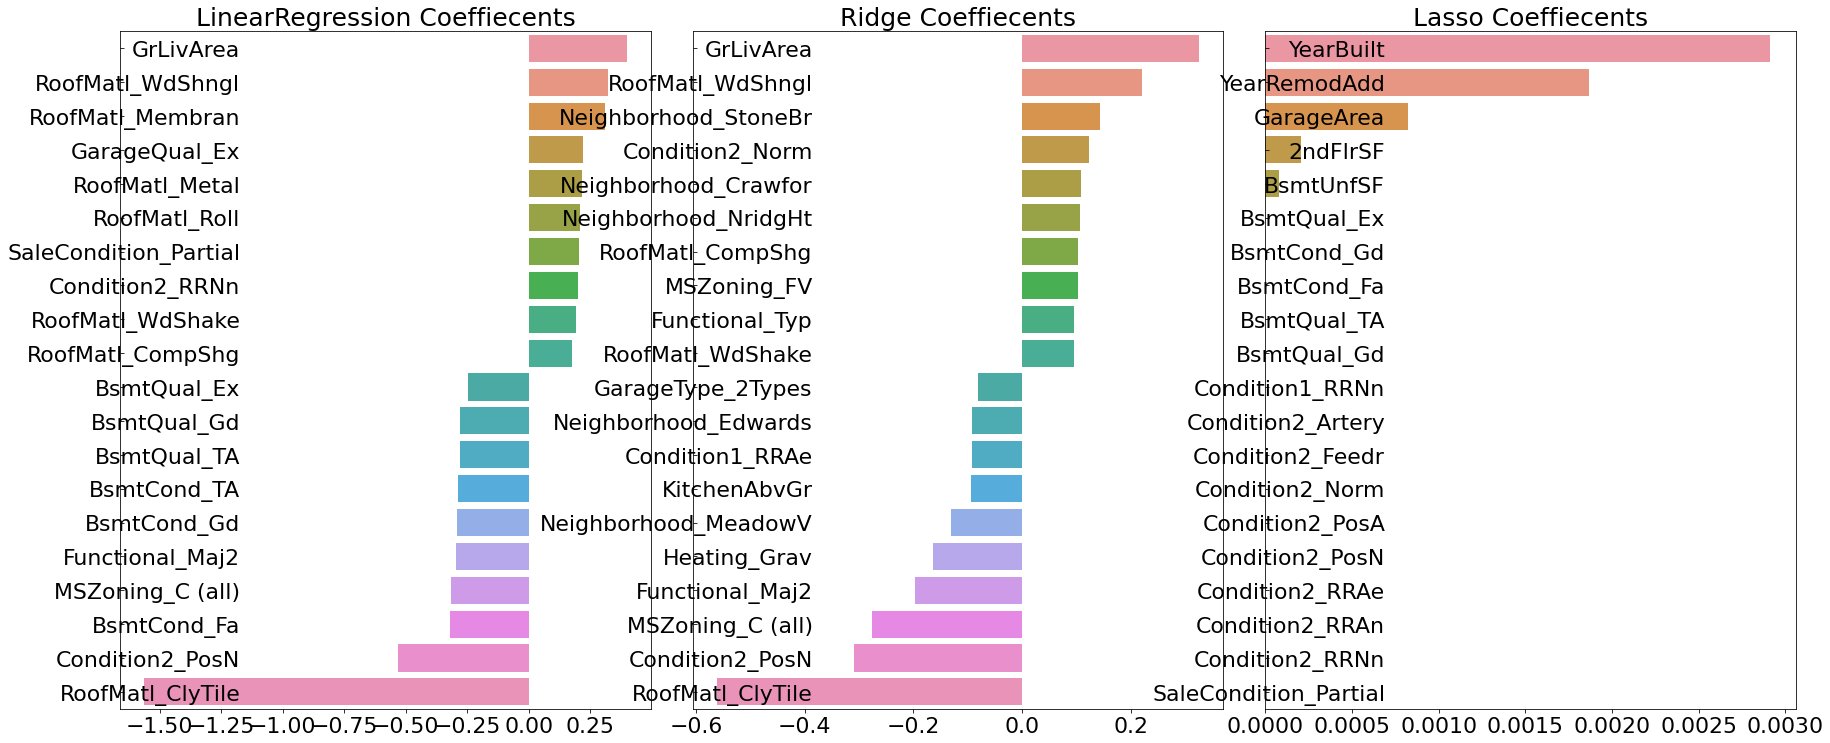

In [93]:
# 탑 10, 바텀 10의 계수 확인
def get_top_bottom_coef(model, n=10):
    coef = pd.Series(model.coef_, index=X.columns)
    
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_bottom = coef.sort_values(ascending=False).tail(n)
    
    return coef_high, coef_bottom

# 데이터 시각화
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    
    for i_num, model in enumerate(models):
        head, tail = get_top_bottom_coef(model, n=10)
        coef_concat = pd.concat([head, tail])
        
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size= 25)
        axs[i_num].tick_params(axis="y", direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
        
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

라쏘 모델의 rmsle가 낮은 이유는 회귀 계수가 너무 낮고, 치우쳐 있기 때문이다. <br>
혹시 학습데이터 분할에 문제가 있어서 그런 것인지, 이번에는 교차검증 폴드 세트로 분할해서 RMSE를 측정해보자

In [94]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
        rmse_avg = np.mean(rmse_list)
        
        print(model.__class__.__name__ + " CV RMSE 값 리스트: ", rmse_list)
        print(model.__class__.__name__ + " CV RMSE 평균 값: ", rmse_avg)
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)

LinearRegression CV RMSE 값 리스트:  [0.12198741 0.14728273 0.15847397 0.11366951 0.16062562]
LinearRegression CV RMSE 평균 값:  0.14040784656029678
Ridge CV RMSE 값 리스트:  [0.10903169 0.14053858 0.13556232 0.1121319  0.15538594]
Ridge CV RMSE 평균 값:  0.13053008456413473
Lasso CV RMSE 값 리스트:  [0.22966185 0.26322063 0.25215117 0.25133932 0.26049542]
Lasso CV RMSE 평균 값:  0.2513736779801744


cross_val_ 을 진행해도 라쏘모델의 성능이 떨어진다. 모델을 향상시키기 위해서는 라쏘모델의 하이퍼 파라미터 튜닝을 해야한다.

In [95]:
from sklearn.model_selection import GridSearchCV

def print_best_param(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring="neg_mean_squared_error", cv=5)
    grid_model.fit(X, y)
    
    rmse = np.sqrt(-1*grid_model.best_score_)
    
    print("{0} 5CV 시 최적 평균 RMSE: {1:.4f}, 최적 alpha: {2}".format(model.__class__.__name__, rmse, grid_model.best_params_))

    
ridge_params = {'alpha':[0.05,0.1,1,5,10,12,13,15,20]}
lasso_params = {'alpha': [0.0001,0.001, 0.0009,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}

print_best_param(ridge_reg, ridge_params)
print_best_param(lasso_reg, lasso_params)

Ridge 5CV 시 최적 평균 RMSE: 0.1276, 최적 alpha: {'alpha': 10}
Lasso 5CV 시 최적 평균 RMSE: 0.1245, 최적 alpha: {'alpha': 0.0009}


In [90]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.0009)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(model)

LinearRegression  로그 변환된 RMSE:  0.132
Ridge  로그 변환된 RMSE:  0.128
Lasso  로그 변환된 RMSE:  0.176


[0.13189576579154352, 0.12750846334053045, 0.17628250556471395]

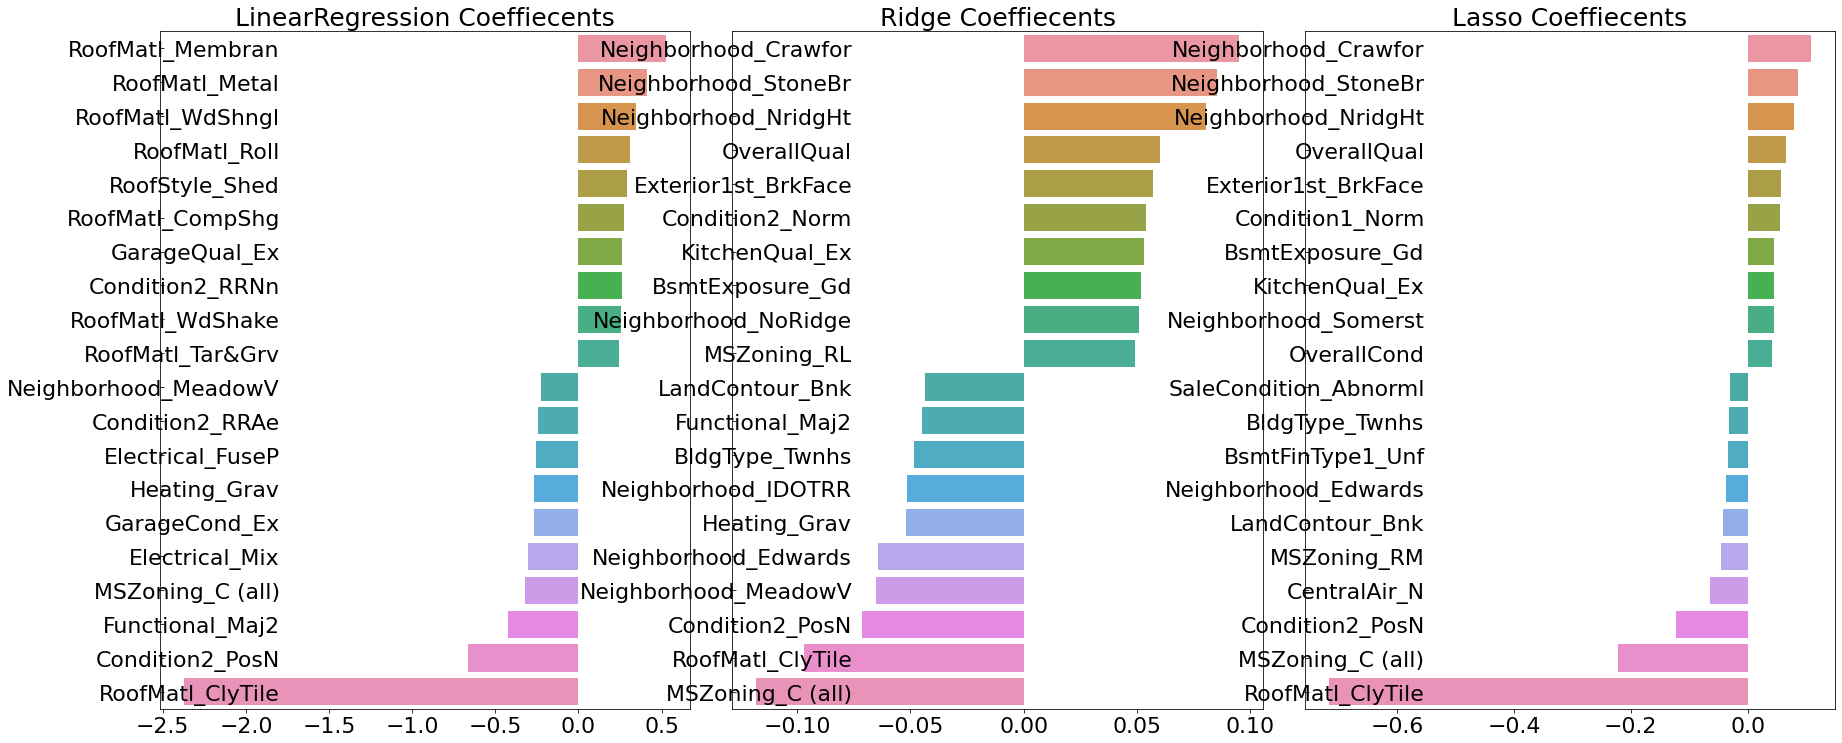

In [84]:
visualize_coefficient(models)

In [85]:
# 데이터 이상치 제거를 통한 모델 개선
# 원핫 인코딩이 진행되지 않은 데이터셋에 skew함수를 적용해야 한다.
from scipy.stats import skew

feature_index = data.dtypes[data.dtypes != 'object'].index
skew_features = data[feature_index].apply(lambda x : skew(x))

skew_features_top = skew_features[skew_features>1]
print(skew_features_top.sort_values(ascending = False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [96]:
# 왜곡된 데이터가 많이 줄어들었다.
data[skew_features_top.index] = np.log1p(data[skew_features_top.index])

skew_features = data[feature_index].apply(lambda x : skew(x))

skew_features_top = skew_features[skew_features>1]
print(skew_features_top.sort_values(ascending = False))

PoolArea         14.338635
3SsnPorch         7.620307
LowQualFinSF      7.307715
MiscVal           5.020589
BsmtHalfBath      3.874077
ScreenPorch       3.113430
BsmtFinSF2        2.432459
EnclosedPorch     2.052939
KitchenAbvGr      1.614887
dtype: float64


In [106]:
# 다시 원핫 인코딩을 하고 모델을 학습시킨다.
from sklearn.model_selection import GridSearchCV

data_ohe = pd.get_dummies(data)

y = data_ohe['SalePrice']
X = data_ohe.drop('SalePrice', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

ridge_params = {'alpha':[0.05,0.1,1,5,10,12,13,15,20]}
lasso_params = {'alpha': [0.0001,0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}


print_best_param(ridge_reg, ridge_params)
print_best_param(lasso_reg, lasso_params)

Ridge 5CV 시 최적 평균 RMSE: 0.1275, 최적 alpha: {'alpha': 10}
Lasso 5CV 시 최적 평균 RMSE: 0.1251, 최적 alpha: {'alpha': 0.001}


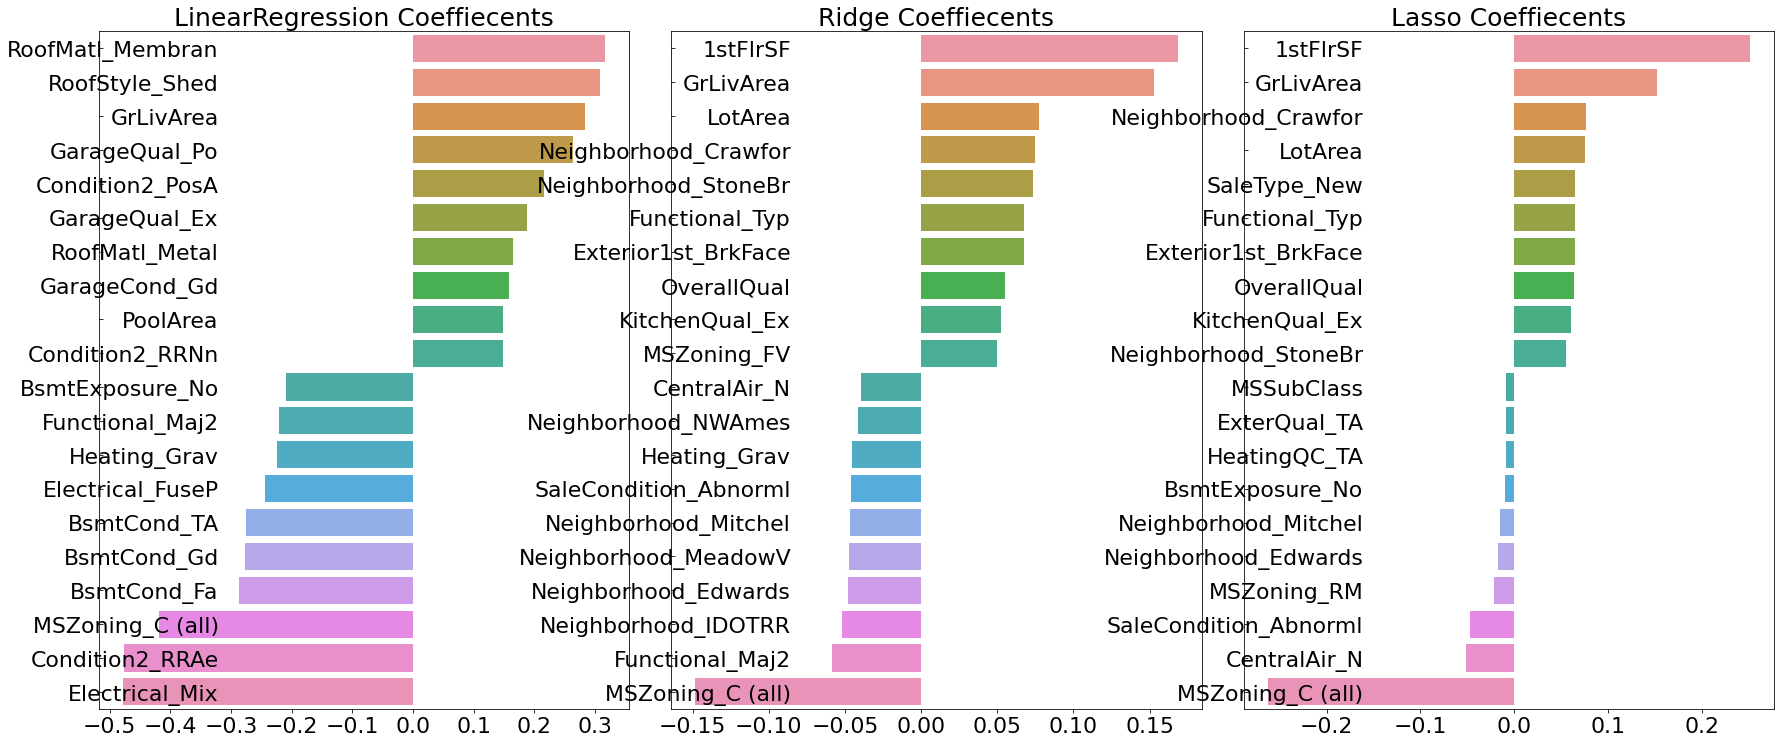

In [138]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

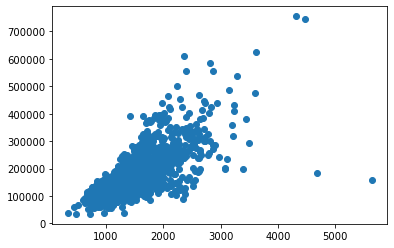

In [139]:
# 가장 중요한 피처를 봐보자. 원본데이터를 저장을 안해놔서 이렇게 해야함..
plt.scatter(x=np.expm1(data['GrLivArea']), y=np.expm1(data['SalePrice']))

In [140]:
# 이상치 데이터 제거
con1 = data_ohe['GrLivArea'] > np.log1p(4000)
con2 = data_ohe['SalePrice'] < np.log1p(500000)

outlier = data_ohe[con1&con2].index
data_ohe.drop(outlier, axis=0, inplace=True)

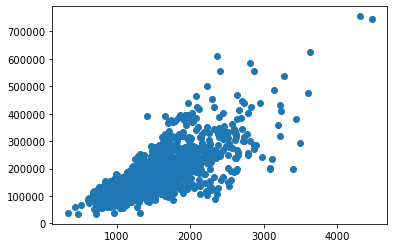

In [141]:
plt.scatter(x=np.expm1(data_ohe['GrLivArea']), y=np.expm1(data_ohe['SalePrice']))

In [142]:
# 다시 모델을 학습시킨다.
y = data_ohe['SalePrice']
X = data_ohe.drop('SalePrice', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

ridge_params = {'alpha':[0.05,0.1,1,5,10,12,13,15,20]}
lasso_params = {'alpha': [0.0001,0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}


print_best_param(ridge_reg, ridge_params)
print_best_param(lasso_reg, lasso_params)

Ridge 5CV 시 최적 평균 RMSE: 0.1126, 최적 alpha: {'alpha': 10}
Lasso 5CV 시 최적 평균 RMSE: 0.1123, 최적 alpha: {'alpha': 0.001}


LinearRegression  로그 변환된 RMSE:  0.129
Ridge  로그 변환된 RMSE:  0.103
Lasso  로그 변환된 RMSE:  0.1


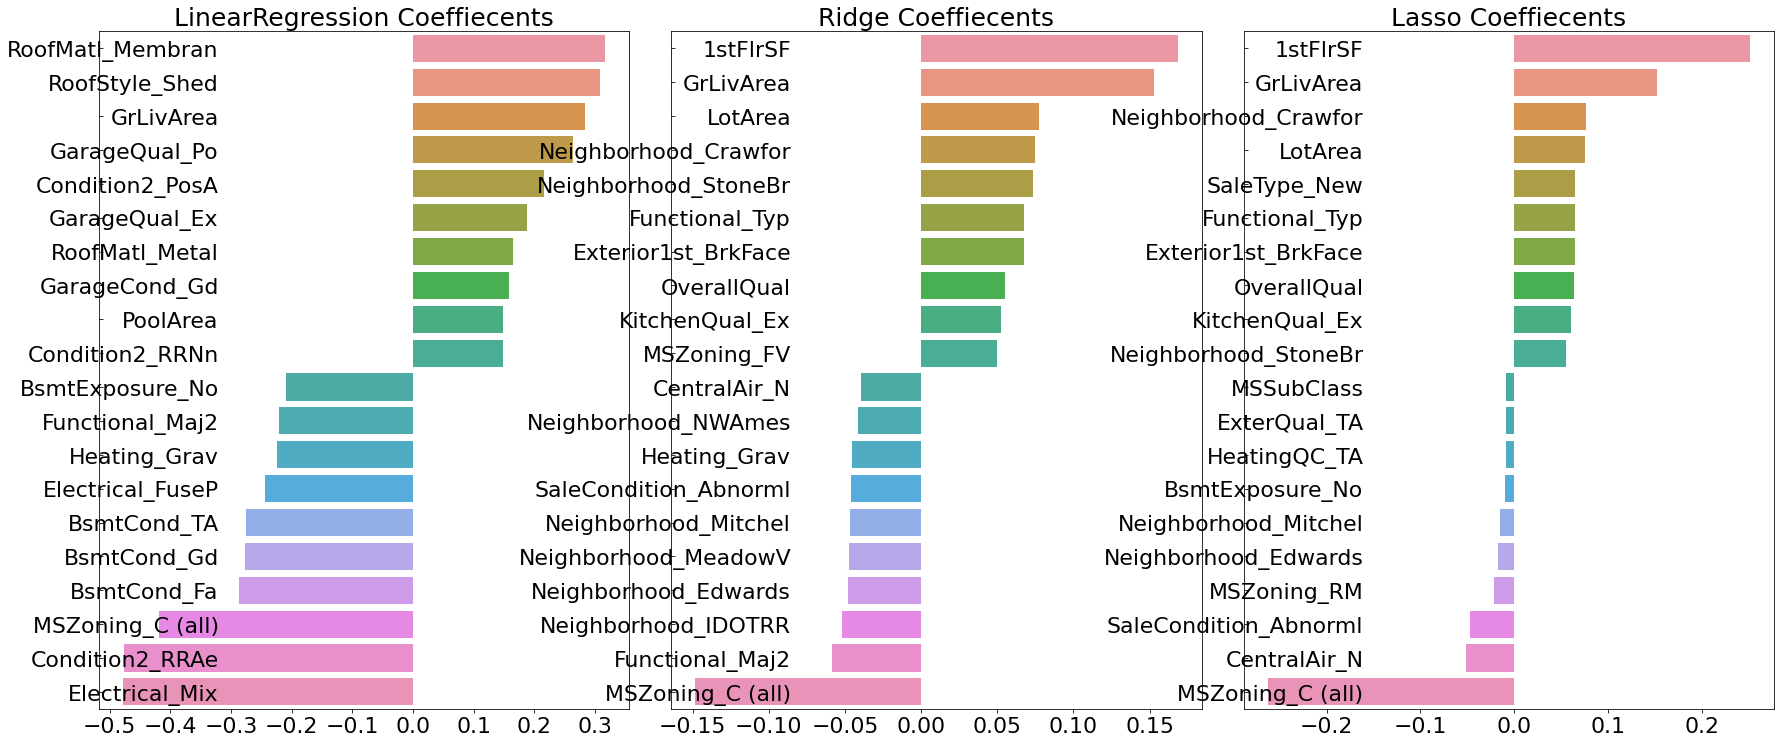

In [134]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

#### 회귀 트리 모델 학습/예측/평가

In [143]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
print_best_param(xgb_reg, xgb_params)

XGBRegressor 5CV 시 최적 평균 RMSE: 0.1178, 최적 alpha: {'n_estimators': 1000}


In [146]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, 
                        subsample=0.6, num_leaves=4, reg_lambda=10,n_jobs=-1)
print_best_param(lgbm_reg, lgbm_params)

LGBMRegressor 5CV 시 최적 평균 RMSE: 0.1165, 최적 alpha: {'n_estimators': 1000}


In [148]:
# 회귀 모델의 예측 결과 혼합을 통한 최종 예측
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse=np.sqrt(mse)
        print(key, "모델의 RMSE: ", rmse)

ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

pred = 0.4*ridge_pred + 0.6*lasso_pred
preds = {'최종혼합': pred,
        'ridge':ridge_pred,
        'lasso': lasso_pred}

get_rmse_pred(preds)

최종혼합 모델의 RMSE:  0.09966514052353531
ridge 모델의 RMSE:  0.10288980218833532
lasso 모델의 RMSE:  0.10001446974492108


In [151]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, 
                        subsample=0.6, num_leaves=4, reg_lambda=10,n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.4*xgb_pred+0.6*lgbm_pred

preds= {"최종 혼합": pred,
       'xgb': xgb_pred,
       'lgbm': lgbm_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE:  0.10154300601011912
xgb 모델의 RMSE:  0.10738295638346222
lgbm 모델의 RMSE:  0.10296653528637886


스태킹 앙상블 모댈을 통한 회귀 예측

In [172]:
from sklearn.model_selection import KFold


def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=False)
    
    # 추후에 메타 모델이 사용할 합습데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작 ')
    
    for folder_counter, (train_index, vaild_index) in enumerate(kf.split(X_train_n)):
        print("\t 폴드 세트: ", folder_counter, ' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[vaild_index]
        
        model.fit(X_tr, y_tr)
        
        train_fold_pred[vaild_index, :] = model.predict(X_te).reshape(-1,1)
        test_pred[:, folder_counter] = model.predict(X_test_n)
    
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    return train_fold_pred, test_pred_mean


In [173]:
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [178]:
final_X_train = np.concatenate((ridge_train,lasso_train,xgb_train,lgbm_train), axis=1)
final_X_test = np.concatenate((ridge_test,lasso_test,xgb_test,lgbm_test),axis=1)

meta_model_lasso = Lasso(alpha=0.0005)

meta_model_lasso.fit(final_X_train, y_train)
final = meta_model_lasso.predict(final_X_test)
mse = mean_squared_error(y_test, final)
rmse=np.sqrt(mse)
print('스태킹 모델 최종 rmse: ', rmse)

스태킹 모델 최종 rmse:  0.09755278712835042
